# vivarium-ecoli

Wiring diagraph of the [Covert lab's Whole-Cell E. coli model][https://github.com/CovertLab/vivarium-ecoli]

In [12]:
from bigraph_viz import plot_bigraph
from bigraph_viz.dict_utils import replace_regex_recursive

save_files = True

plot_settings = {
    'dpi': '100',
    'port_label_size': '12pt',
    'node_label_size': '20pt',
    'process_label_size': '20pt',
    'label_margin': '0.02',
    'undirected_edges': True,
}
if save_files:
    plot_settings['out_dir'] = 'out'
    plot_settings['file_format'] = 'png'
    plot_settings['dpi'] = '2000'


## E. coli core model

In [13]:
ecoli = { 
    'chromosome<br/>structure': {
        '_type': 'process',
        'inputs': {
            'fragmentBases': ['bulk<br/>molecules',],
            'molecules': ['bulk<br/>molecules',],
            'active<br/>tfs': ['bulk<br/>molecules',],
            'subunits': ['bulk<br/>molecules',],
            'amino<br/>acids': ['bulk<br/>molecules',],
            'active<br/>replisomes': ['unique<br/>molecules', 'active<br/>replisome'],
            'oriCs': ['unique<br/>molecules', 'oriC'],
            'chromosome<br/>domains': ['unique<br/>molecules', 'chromosome<br/>domain'],
            'active<br/>RNAPs': ['unique<br/>molecules', 'active<br/>RNAP'],
            'RNAs': ['unique<br/>molecules', 'RNA'],
            'active<br/>ribosome': ['unique<br/>molecules', 'active<br/>ribosome'],
            'full<br/>chromosomes': ['unique<br/>molecules', 'full<br/>chromosome'],
            'promoters': ['unique<br/>molecules', 'promoter'],
            'DnaA<br/>boxes': ['unique<br/>molecules', 'DnaA<br/>box']
        }
    },
    'metabolism': {
        '_type': 'process',
        'inputs': {
            'metabolites': ['bulk<br/>molecules',],
            'catalysts': ['bulk<br/>molecules',],
            'kinetics<br/>enzymes': ['bulk<br/>molecules',],
            'kinetics<br/>substrates': ['bulk<br/>molecules',],
            'amino<br/>acids': ['bulk<br/>molecules',],
            'environment': ['environment',],
            # 'polypeptide<br/>elongation': ['process<br/>state', 'polypeptide<br/>elongation'],
            'amino<br/>acids<br/>total': ['bulk<br/>molecules',]
        }
    },
    'tf<br/>binding': {
         '_type': 'process',
        'inputs': {
            'promoters': ['unique<br/>molecules', 'promoter'],
            'active<br/>tfs': ['bulk<br/>molecules',],
            'active<br/>tfs<br/>total': ['bulk<br/>molecules',],
            'inactive<br/>tfs<br/>total': ['bulk<br/>molecules',],
        }
    },
    'transcript<br/>initiation': {
        '_type': 'process',
        'inputs': {
            'environment': ['environment',],
            'full<br/>chromosomes': ['unique<br/>molecules', 'full<br/>chromosome'],
            'RNAs': ['unique<br/>molecules', 'RNA'],
            'active<br/>RNAPs': ['unique<br/>molecules', 'active<br/>RNAP'],
            'promoters': ['unique<br/>molecules', 'promoter'],
            'molecules': ['bulk<br/>molecules',],
        }
    },
    'transcript<br/>elongation': {
        '_type': 'process',
        'inputs': {
            'environment': ['environment',],
            'RNAs': ['unique<br/>molecules', 'RNA'],
            'active<br/>RNAPs': ['unique<br/>molecules', 'active<br/>RNAP'],
            'molecules': ['bulk<br/>molecules',],
            'bulk<br/>RNAs': ['bulk<br/>molecules',],
            'ntps': ['bulk<br/>molecules',],
        }
    },
    'rna<br/>degradation': {
        '_type': 'process',
        'inputs': {
            'charged<br/>trna': ['bulk<br/>molecules',],
            'bulk<br/>RNAs': ['bulk<br/>molecules',],
            'nmps': ['bulk<br/>molecules',],
            'fragmentMetabolites': ['bulk<br/>molecules',],
            'fragmentBases': ['bulk<br/>molecules',],
            'endoRnases': ['bulk<br/>molecules',],
            'exoRnases': ['bulk<br/>molecules',],
            'subunits': ['bulk<br/>molecules',],
            'molecules': ['bulk<br/>molecules',],
            'RNAs': ['unique<br/>molecules', 'RNA'],
            'active<br/>ribosome': ['unique<br/>molecules', 'active<br/>ribosome'],
        }
    },
    'polypeptide<br/>initiation': {
        '_type': 'process',
        'inputs': {
            'environment': ['environment',],
            'active<br/>ribosome': ['unique<br/>molecules', 'active<br/>ribosome'],
            'RNA': ['unique<br/>molecules', 'RNA'],
            'subunits': ['bulk<br/>molecules',]
        }
    },
    'polypeptide<br/>elongation': {
        '_type': 'process',
        'inputs': {
            'environment': ['environment',],
            'active<br/>ribosome': ['unique<br/>molecules', 'active<br/>ribosome'],
            'molecules': ['bulk<br/>molecules',],
            'monomers': ['bulk<br/>molecules',],
            'amino<br/>acids': ['bulk<br/>molecules',],
            'ppgpp<br/>reaction<br/>metabolites': ['bulk<br/>molecules',],
            'uncharged<br/>trna': ['bulk<br/>molecules',],
            'charged<br/>trna': ['bulk<br/>molecules',],
            'charging<br/>molecules': ['bulk<br/>molecules',],
            'synthetases': ['bulk<br/>molecules',],
            'subunits': ['bulk<br/>molecules',],
            # 'polypeptide<br/>elongation': ['process<br/>state', 'polypeptide<br/>elongation'],
            'molecules<br/>total': ['bulk<br/>molecules',],
            'amino<br/>acids<br/>total': ['bulk<br/>molecules',],
            'charged<br/>trna<br/>total': ['bulk<br/>molecules',],
            'uncharged<br/>trna<br/>total': ['bulk<br/>molecules',]
        }
    },
    'complexation': {
        '_type': 'process',
        'inputs': {
            'molecules': ['bulk<br/>molecules',], 
        }
    },
    'two<br/>component<br/>system': {
        '_type': 'process',
        'inputs': {
            'molecules': ['bulk<br/>molecules',]
        }
    },
    'equilibrium': {
        '_type': 'process',
        'inputs': {
            'molecules': ['bulk<br/>molecules',]
        }
    },
    'protein<br/>degradation': {
        '_type': 'process',
        'inputs': {
            'metabolites': ['bulk<br/>molecules',],
            'proteins': ['bulk<br/>molecules',]
        }
    },
    'chromosome<br/>replication': {
        '_type': 'process',
        'inputs': {
            'replisome<br/>trimers': ['bulk<br/>molecules',],
            'replisome<br/>monomers': ['bulk<br/>molecules',],
            'dntps': ['bulk<br/>molecules',],
            'ppi': ['bulk<br/>molecules',],
            'active<br/>replisomes': ['unique<br/>molecules', 'active<br/>replisome'],
            'oriCs': ['unique<br/>molecules', 'oriC'],
            'chromosome<br/>domains': ['unique<br/>molecules', 'chromosome<br/>domain'],
            'full<br/>chromosomes': ['unique<br/>molecules', 'full<br/>chromosome'],
            'environment': ['environment',]
        }
    },
    'unique<br/>molecules': {
        'chromosome<br/>domain': {},
        'full<br/>chromosome': {},
        'oriC': {},
        'active<br/>replisome': {},
        'RNA': {},
        'active<br/>ribosome': {},
        'DnaA<br/>box': {},
        'promoter': {},
    },
    'bulk<br/>molecules': {},
    'environment': {},
}


## E. coli wiring diagram

In [ ]:
node_groups = [[
        ['unique<br/>molecules',], ['bulk<br/>molecules',], ['environment',],
    ],
]
plot_settings2 = {
    'node_groups': node_groups,
    'remove_process_place_edges': True,
    'aspect_ratio': 'fill',
    # 'aspect_ratio': '0.25',
}
fig = plot_bigraph(ecoli,
                   **plot_settings,
                   **plot_settings2,
                   size='10,5',
                   filename='ecoli'
                   )

fig2 = plot_bigraph(ecoli,
                    **plot_settings,
                    **plot_settings2,
                    size='5,10',
                    rankdir='RL',
                    filename='ecoliRL',
                    )
fig

Writing out/ecoli
Writing out/ecoliRL


## E. coli subsets

Writing out/ecoli_subset1
node ('unique<br/>molecules',) not in graph
Writing out/ecoli_subset2


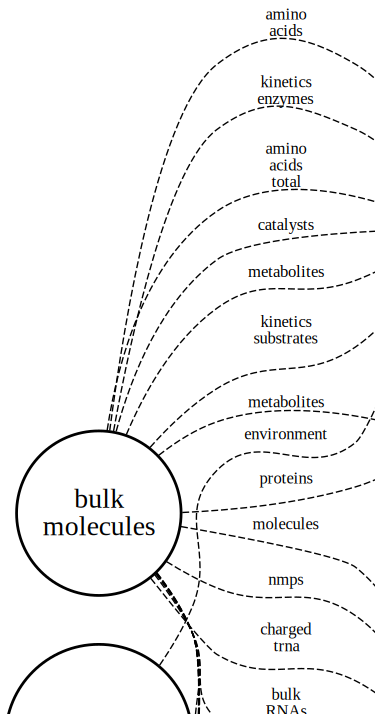

In [4]:
ecoli_subset1 = {
    'chromosome<br/>structure': ecoli['chromosome<br/>structure'],
    # 'metabolism': ecoli['metabolism'],
    # 'tf<br/>binding': ecoli['tf<br/>binding'],
    'transcript<br/>initiation': ecoli['transcript<br/>initiation'],
}

# ecoli subset 2 pulls out only the processes that are connected to bulk, and not to unique
rna_deg = ecoli['rna<br/>degradation'].copy()
del rna_deg['inputs']['RNAs']
del rna_deg['inputs']['active<br/>ribosome']
ecoli_subset2 = {
    'metabolism': ecoli['metabolism'],
    'rna<br/>degradation': rna_deg,
    'protein<br/>degradation': ecoli['protein<br/>degradation'],
}

plot_settings3 = {
    'node_groups': node_groups,
    'remove_process_place_edges': True,
}
plot_bigraph(ecoli_subset1,
             **plot_settings,
             **plot_settings3,
             rankdir='RL',
             filename='ecoli_subset1')
plot_bigraph(ecoli_subset2,
             **plot_settings,
             **plot_settings3,
             rankdir='LR',
             filename='ecoli_subset2')

## E. coli use cases

node ('unique<br/>molecules',) not in graph
node ('bulk<br/>molecules',) not in graph
node ('environment',) not in graph
Writing out/ecoli1
node ('unique<br/>molecules',) not in graph
node ('bulk<br/>molecules',) not in graph
node ('environment',) not in graph
Writing out/ecoli2


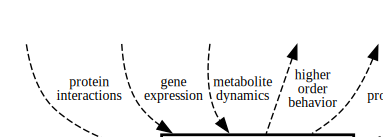

In [5]:
ecoli1 = {
    'biomanufacturing ecoli': {
        '_type': 'process',
        '_inputs': {
            # For gene expression, protein interactions, and metabolite dynamics
            'gene<br/>expression': 'any',
            'protein<br/>interactions': 'any',
            'metabolite<br/>dynamics': 'any',
        },
        '_outputs': {
            #cellular composition, properties such as cell size and growth rate, and higher-order behavior
            'cell<br/>composition': 'any',
            'cell<br/>properties': 'any',
            'higher<br/>order<br/>behavior': 'any',

        }
    }
}
ecoli2 = {
    'antimicrobial efficacy ecoli': {
        '_type': 'process',
        '_inputs': {
            # For gene expression, protein interactions, and metabolite dynamics
            'gene<br/>expression': 'any',
            'protein<br/>interactions': 'any',
            'metabolite<br/>dynamics': 'any',
        },
        '_outputs': {
            #cellular composition, properties such as cell size and growth rate, and higher-order behavior
            'cell<br/>composition': 'any',
            'cell<br/>properties': 'any',
            'higher<br/>order<br/>behavior': 'any',
        }
    }
}


plot_settings2['dpi'] = '100'
plot_bigraph(ecoli1, **plot_settings2, filename='ecoli1')
plot_bigraph(ecoli2, **plot_settings2, filename='ecoli2')

## E. coli colony

Writing out/ecoli_colony


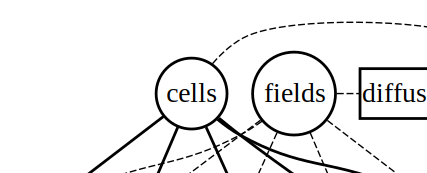

In [6]:
ecoli_schema = {
    '_type': 'process',
    'inputs': {'uptake': ['..', 'fields'],}}
n_ecoli = 6

ecoli_env = {
    # 'environment': {
        'cells': {
            f'ecoli{n}': ecoli_schema for n in range(1, n_ecoli)
        },
        'fields': {},
        'diffusion': {
            '_type': 'process',
            'inputs': {
                '': ['fields',]
            }
        },
        'mother<br/>machine': {
            '_type': 'process',
            'inputs': {
                '': ['cells',]
            }
        }
    # }
}

plot_settings3 = {
    'rankdir': 'TB',
    'port_labels': False,
    'size': '10,10',
    'node_groups': [
        [['diffusion',], ['mother<br/>machine',], ['cells',], ['fields',],],
        # [['environment', 'diffusion',], ['environment', 'mother<br/>machine',], ['environment', 'cells',], ['environment', 'fields',],],
    ],
}
# ecoli_env = replace_regex_recursive[ecoli_env]
plot_bigraph(ecoli_env,
             **plot_settings,
             **plot_settings3,
             filename='ecoli_colony')

## E. coli with ML components

Writing out/ml_ecoli


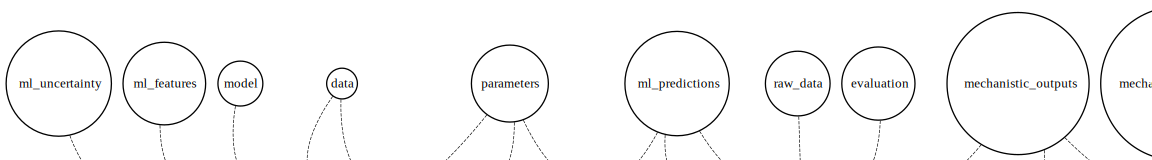

In [7]:
ml_ecoli = {
    'ML_model': {
        '_type': 'process',
        'inputs': {
            'training_data': ['data'],  # Experimental or simulated data for training
            'model_checkpoint': ['model'],  # Saved model state for inference or fine-tuning
            'hyperparameters': ['parameters'],  # Learning rate, architecture, etc.
            'mechanistic_predictions': ['mechanistic_outputs'],  # Feedback from mechanistic model
        },
        'outputs': {
            'learned_parameters': ['parameters'],  # Tuned parameters for mechanistic model
            'predictions': ['ml_predictions'],  # Forecasted states or outputs
            'uncertainty_estimates': ['ml_uncertainty'],  # Confidence in predictions
            'feature_importance': ['ml_features'],  # Key inputs influencing predictions
        }
    },
    'mechanistic_model': {
        '_type': 'process',
        'inputs': {
            'initial_conditions': ['state'],  # Initial biochemical states
            'environmental_inputs': ['env_conditions'],  # Temperature, nutrients, etc.
            'parameters': ['parameters'],  # Updated parameters from ML module
            'ml_predictions': ['ml_predictions'],  # Predictions as potential constraints or priors
        },
        'outputs': {
            'simulation_results': ['mechanistic_outputs'],  # Time-series of biochemical states
            'constraint_violations': ['mechanistic_feedback'],  # Identified inconsistencies
            'sensitivity_analysis': ['mechanistic_sensitivity'],  # Impact of parameters on results
        }
    },
    'data_integration': {
        '_type': 'process',
        'inputs': {
            'experimental_data': ['raw_data'],  # Direct observations from experiments
            'simulation_results': ['mechanistic_outputs'],  # Mechanistic model outputs
            'ml_predictions': ['ml_predictions'],  # ML-generated outputs
        },
        'outputs': {
            'processed_data': ['data'],  # Cleaned and formatted dataset
            'performance_metrics': ['evaluation'],  # Model performance comparison
        }
    }
}


plot_settings4 = {}
plot_bigraph(ml_ecoli,
             **plot_settings,
             **plot_settings4,
             filename='ml_ecoli')

Writing out/comp


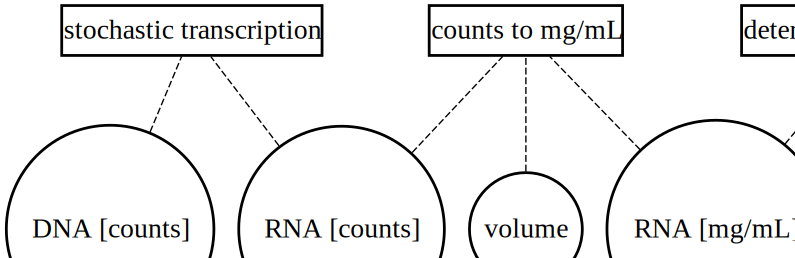

In [8]:
comp = {
    'stochastic transcription': {
        '_type': 'process',
        'inputs': {
            'DNA': ['DNA [counts]'],
            'RNA': ['RNA [counts]'],
        }
    },
    'counts to mg/mL': {
        '_type': 'process',
        'inputs': {
            'RNA_counts': ['RNA [counts]'],
            'RNA_concs': ['RNA [mg/mL]'],
            'volume': ['volume'],
        }
    },
    'deterministic translation': {
        '_type': 'process',
        'inputs': {
            'RNA': ['RNA [mg/mL]'],
            'Protein': ['Protein [mg/mL]'],
        }
    },
    'DNA [counts]': {},
    'RNA [counts]': {},
    'RNA [mg/mL]': {},
    'Protein [mg/mL]': {},
    'volume': {},
}

plot_settings3 = {
    **plot_settings,
    'remove_process_place_edges': True,
    'rankdir': 'BT',
    'port_labels': False,
}
plot_bigraph(comp, **plot_settings3, filename='comp')


Writing out/comp_nested1


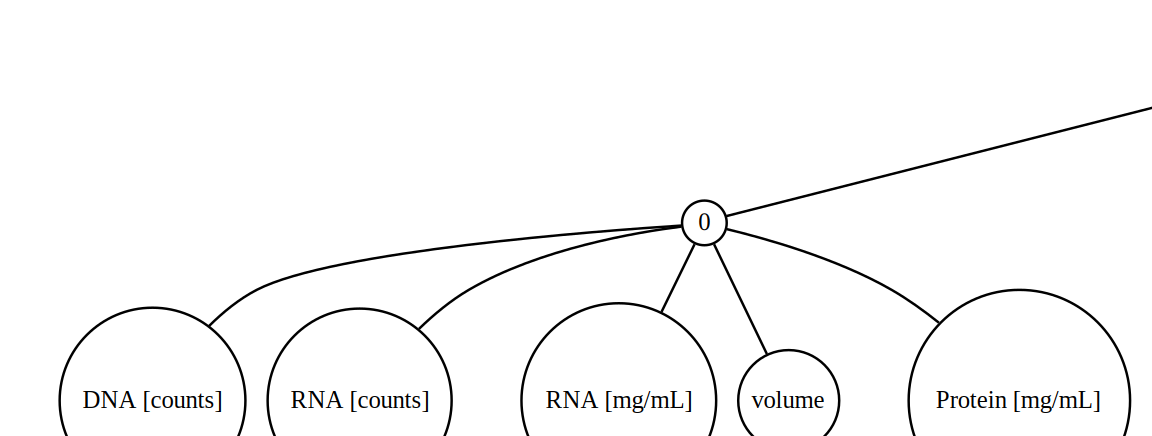

In [9]:
comp_div = {
    'division': {
        '_type': 'process',
        'inputs': {
            'volume': ['volume'],
            'divide': ['..', '..', 'cells'],
        }
    },
    **comp
}

env = {
    'fields': {},
    'dimensions': {},
    'multibody': {
        '_type': 'process',
        'inputs': {
            'cells': ['cells']
        }
    },
    'diffusion': {
        '_type': 'process',
        'inputs': {
            'cells': ['cells'],
            'fields': ['fields'],
            'dimensions': ['dimensions']
        }
    }
}

comp_nested = {
    'cells': {
        '0': comp_div
    },
    **env
}
plot_settings3 = {
    **plot_settings,
    'remove_process_place_edges': True,
    'port_labels': False,
}
plot_bigraph(comp_nested, **plot_settings3, filename='comp_nested1')

Writing out/comp_nested2


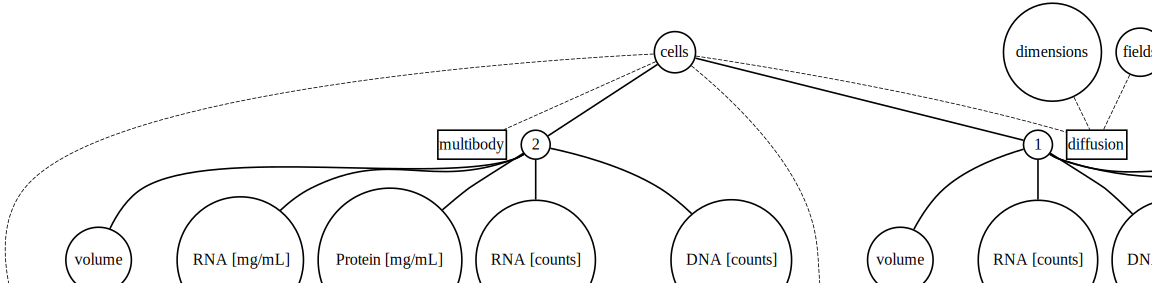

In [10]:
comp_nested = {
    'cells': {
        '1': comp_div,
        '2': comp_div,
    },
    **env
}
plot_bigraph(comp_nested, **plot_settings3, filename='comp_nested2')